# Ejercicio/Tarea 4 Jueves 31 de Agosto

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.
 __(Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos _list_, prueben hacer directamente $(list-S)/S$ )__.
    * Hacer lo mismo usando el método de bisección para $p_k$.

__Nota:__ Se resolveran dudas de esta tarea el Martes 29, así que traten de avanzar para que surjan dudas.

In [1]:
#Sacamos a SymPy y PyPlot desde ahora
using SymPy
using PyPlot

In [2]:
#Utilizaremos la función de raices de newton vistas en clase. El ciclo for nos será de gran ayuda para definir el error
function raicesnewton(init)
    list=zeros(100);      #Estos zeros debe ser el mismo numero de iteraciones, si no (obviamente) se ven ceros de mas
    x=init;
    for i in 1:100
        f = x^(3)-x^(2)-x-1 #Ponemos la funcion y su derivada
        df = 3*x^(2)-2*x-1
        x = x-f/df;         #Metodo de newton en si
        list[i]=x;          #Se hace la lista con las i iteraciones.
    end
    return list
end;

In [3]:
#Los llamamos de otra manera, nos será util para ver las graficas de los errores
list1=raicesnewton(1.5);
list2=raicesnewton(2);
list3=raicesnewton(3);
list4=raicesnewton(4);

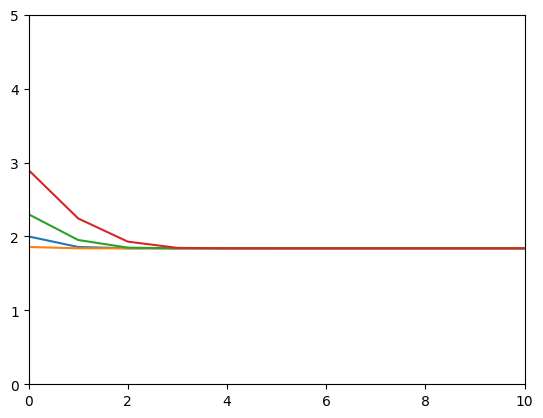

In [4]:
#Mandamos todo a graficar, con x perteneciente a R
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
ylim(0,5)                #xlim y ylim para observar mejor el comportamiento de la grafica
xlim(0,10)
show();

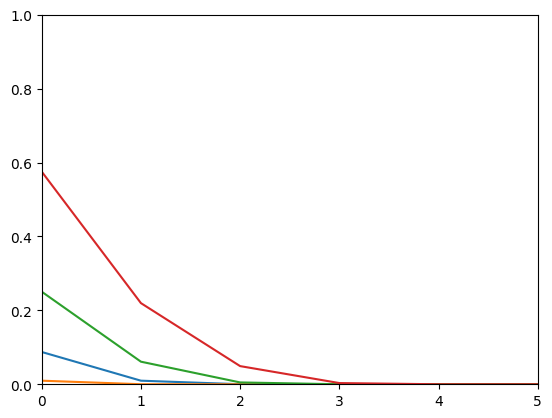

In [5]:
#Calculamos el error, donde listn son todos las iteraciones y listn[100] viene siendo la raiz
plot(real((list1-list1[100])/list1[100]))
plot(real((list2-list2[100])/list2[100]))
plot(real((list3-list3[100])/list3[100]))
plot(real((list4-list4[100])/list4[100]))
ylim(0,1)
xlim(0,5)
show();

In [6]:
function biseccion(a,b)         #Igual, tomamos la funcion vista en clase
    lista=zeros(100);           #A diferencia de la clase, pondremos aquí nuestra lista
    p = (a+b)/2                 # p.d. Biseccion
    f(x) = x^(3)-x^(2)-x-1          
    for i in 1:100
        if  f(a)*f(p) > 0       #ciclos if p.d. biseccion
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        lista[i] = p
    end
    return lista
end;

In [7]:
#De manera similar al metodo de newton...
listaI=biseccion(0,10);
listaII=biseccion(0,20);
listaIII=biseccion(0,30);
listaIV=biseccion(0,40);

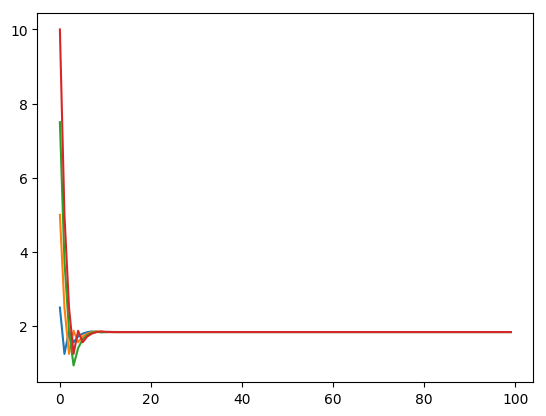

In [8]:
plot(real(listaI))
plot(real(listaII))
plot(real(listaIII))
plot(real(listaIV))
show();

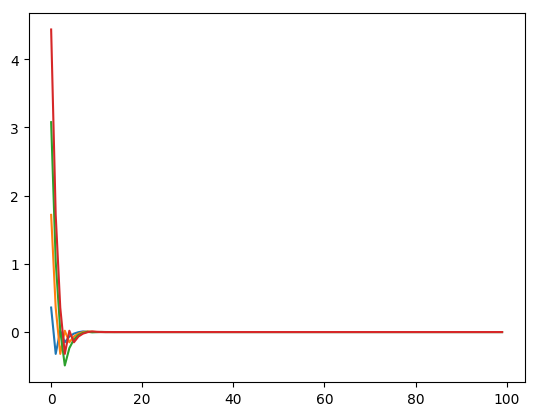

In [9]:
plot(real((listaI-listaI[100])/listaI[100]))
plot(real((listaII-listaII[100])/listaII[100]))
plot(real((listaIII-listaIII[100])/listaIII[100]))
plot(real((listaIV-listaIV[100])/listaIV[100]))
show();

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones __(Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios)__:

 * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`. El _output_ debe ser alguna raíz.

In [10]:
#De manera algo tramposa, primero definimos f y df, pues si los ponemos tal cual cuando llamamos la funcion, nos dirá
#que x no está definida. (con python esto no sucede?)

function f(x);
    x^3-x^2-x-1
end;

function df(x);
    3x^2-x^2-1
end;

In [11]:
function metodo_newton(f,df,init) #Definimos como al principio
    x = init;
    for i in 1:100
        x = x-(f(x)/df(x));         #Metodo de newton en si
    end
    return x                   #Que nos devuelva la iteración final.
end;

In [12]:
metodo_newton(f,df,1)

1.8392867552141612

* Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con `linspace`. Es muy probable que funcione llamando la funcion que crearon como `metodo_newton.(f,df,x)`. Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El _ouput_ debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. __Nota:__ Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) `metodo(f)`.

In [13]:
function metodo_newton_lista(f,df,inits)
    list=zeros(length(inits))  #Si tenemos n particiones se hace una lista con n elementos
    x = 0.0
    for i in 1:length(inits)   #Aplicamos metodo de newton para cada elemento de nuestro linspace
        x = inits[i]
        for n in 1:200         #Ciclo for, con 200 iteraciones (Este es el epsilon para el ejercicio siguiente)
            x = x-(f(x)/df(x))        
        end
        list[i] = x            #Una lista con iteraciones finales
    end
    return list                #Return hasta que ya haya obtenido las n raices
end;

In [14]:
metodo_newton_lista(f,df,linspace(10,100,5))

5-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

* Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos `linspace`) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como (por ej.) `t=[]`. El _output_ tiene que ser precisamente `t`. 

In [15]:
function raices_epsilon(inits)
    t = []                                  #Hacemos t un vector vacío
    epsilon = 0.0000001                     #Nuestra epsilon
    list = metodo_newton_lista(f,df,inits)  #Por comodidad, llamamos a la funcion de la lista como lista
    push!(t,list[1])                        #El primer push, para que pueda empezar el ciclo for de i:
    for i in 1:length(t)                    #Por cada elemento de t, hacer esto. Notese que con el push se pueden agregar nuevos elementos
        for n in 1:length(list)             #Ciclo for anidado, ahora sí todos los elementos de la lista de raices
            if abs(t[i]-list[n]) > epsilon  #Comparamos todos los elementos de la lista por solo 1 de t
                push!(t,list[n])            #Si el abs de eso es mayor a epsilon, nos indica que es una raiz diferente.
            end                             #Con el push se agrega un elemento nuevo a t y se repite el primer ciclo for y despues el segundo, de tal manera que empezamos con 1 elemento en t, se compara ese solo elemento con toda la lista: se encuentra una raiz nueva, se agrega a t teniendo 2 elementos y cada uno de esos elementos puede compararse con toda la lista hasta obtener raices diferentes y asi consecutivamente.
        end
        return t                           #Que nos de la lista de raices diferentes                          
    end
end

raices_epsilon (generic function with 1 method)

In [16]:
raices_epsilon(linspace(10,100,10))

1-element Array{Any,1}:
 1.83929

* (__Lean bien este paso!__) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sean solamente la función y la condición inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        * La función que reciba esta rutina debe ser de Julia y el output debe ser un flotante (No un número simbólico!), para la derivada pueden usar SymPy internamente, recuerden que es facil convertir funciones de Julia en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de Julia e iterarlas, consulten la parte donde vimos la función lambdify.

In [17]:
#Ahora solo definimos a f(x)

function f(x);
    x^3-x^2-x-1
end;


In [18]:
#¿Cómo vamos a hacer una función similar a la anterior, si, como dice el enunciado, solo existe la condicion inicial. En otras palabras solo existe 1 condición inicial. 
# Ya que es una condicion inicial, Haremos el metodo_newton(f,df,init) solo que se calculara df dentro de la funcion.
#Por favor, mandarme un correo si es que quieren algo con un linspace, sería cuestion de practicamente copy-paste pero por si las dudas
 
function metodo_newton2(f,initial)
    x=Sym("x")                     #Variable simbolica. Esto hará que, en pocas palabras, se pueda evaluar f(x) en la diff.
    df=diff(f(x),x)                #df es de sympy
    dfJ=lambdify(df,[x])           #con lambdify se vuelve a convertir funcion de julia
    
    x = initial;                   #Despues de derivar, queremos la condicion inicial.
    
    for i in 1:200
        x = x-(f(x)/dfJ(x));         #Metodo de newton en si
    end
    return x                   #Que nos devuelva la iteración final.
end;

In [21]:
metodo_newton2(f,5)

1.8392867552141612

In [22]:
#Verificamos que es un flotante
typeof(ans)

Float64